In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
loans= pd.read_csv(r"C:\Users\yarde\Downloads\loans.csv")
loans.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


***EDA***

In [4]:
loans.drop(columns= ['loan_id'], inplace=True)

In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              553 non-null    object 
 1   married             553 non-null    object 
 2   dependents          553 non-null    object 
 3   education           553 non-null    object 
 4   self_employed       553 non-null    object 
 5   applicant_income    553 non-null    int64  
 6   coapplicant_income  553 non-null    float64
 7   loan_amount         553 non-null    float64
 8   loan_amount_term    553 non-null    float64
 9   credit_history      553 non-null    float64
 10  property_area       553 non-null    object 
 11  loan_status         553 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 52.0+ KB


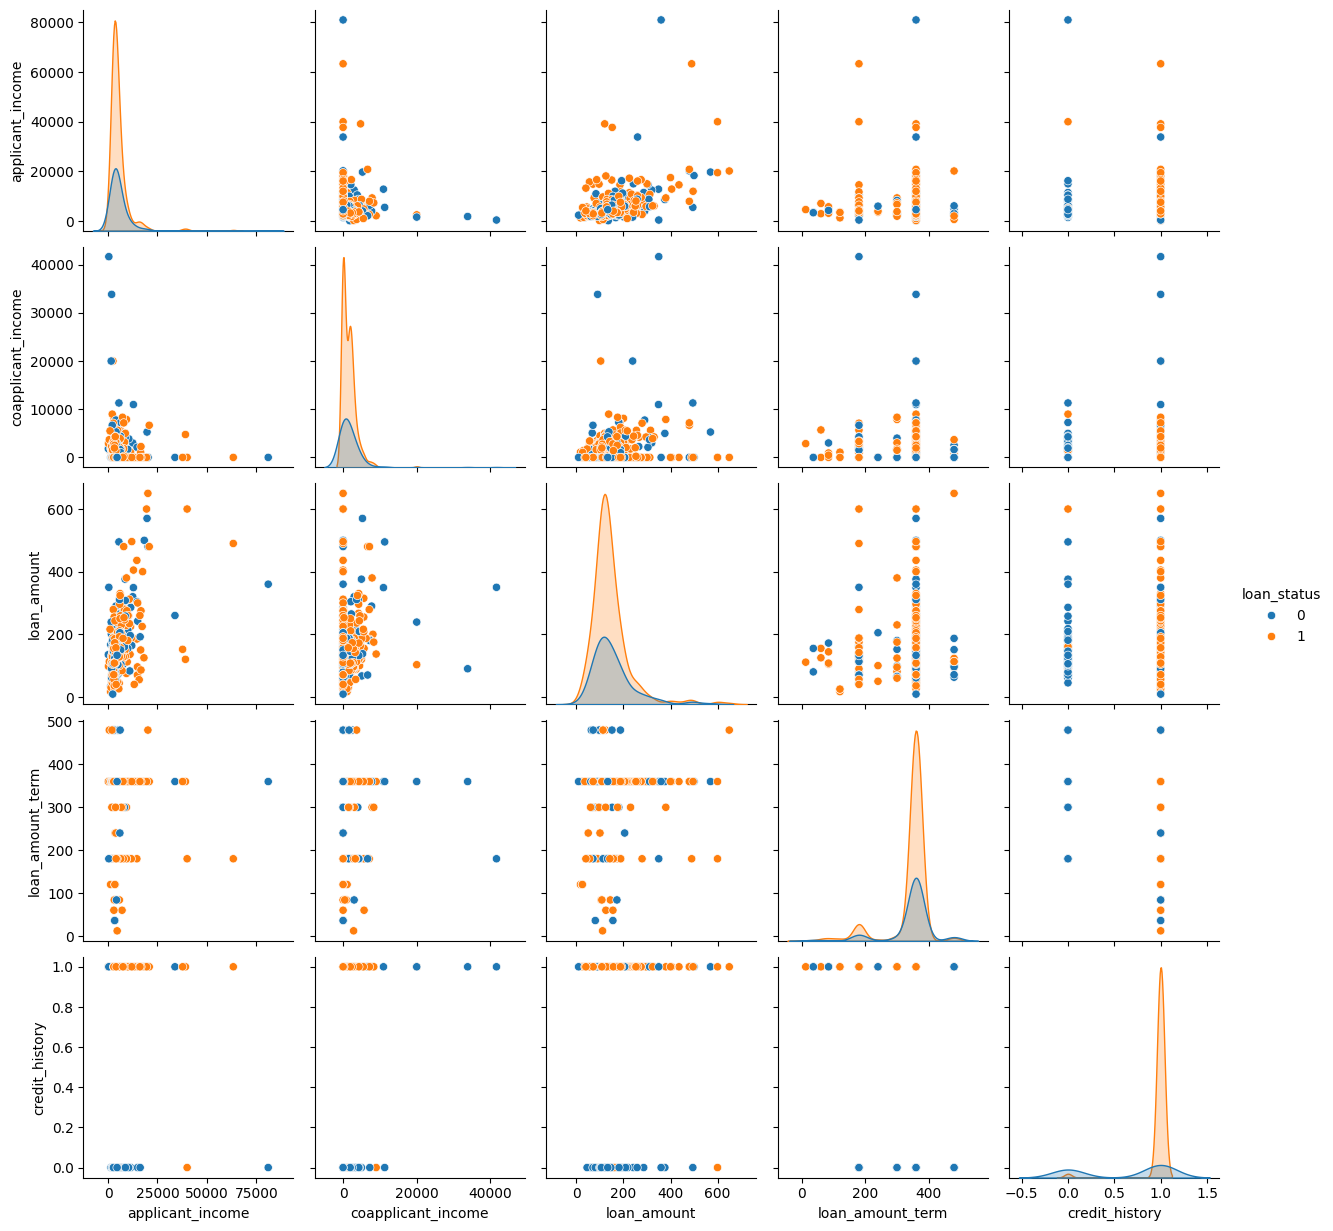

In [6]:
sns.pairplot(data=loans, diag_kind='kde', hue='loan_status')
plt.show()

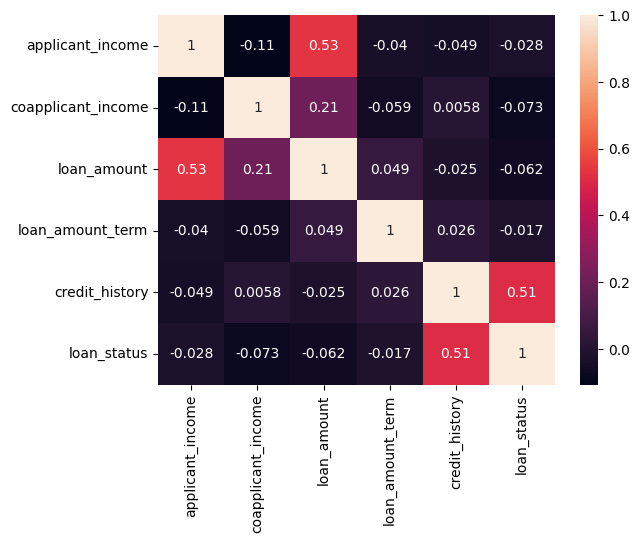

In [10]:
numeric_loans = loans.select_dtypes(include=['number'])
sns.heatmap(numeric_loans.corr(), annot=True)
plt.show()

In [11]:
loans['loan_status'].value_counts(normalize=True)

loan_status
1    0.703436
0    0.296564
Name: proportion, dtype: float64

70% get approved so the module results should look similar

dependents: number of individuals who rely on the applicant for financial support

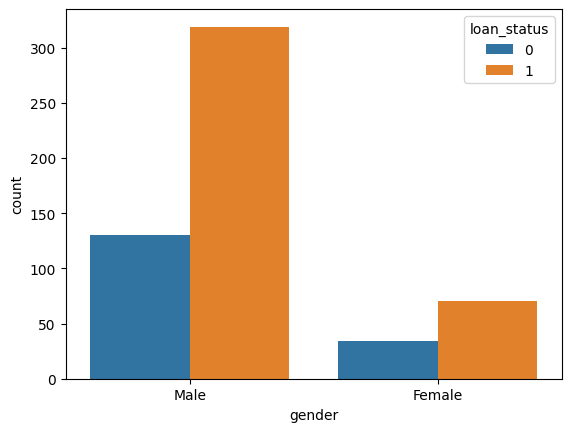

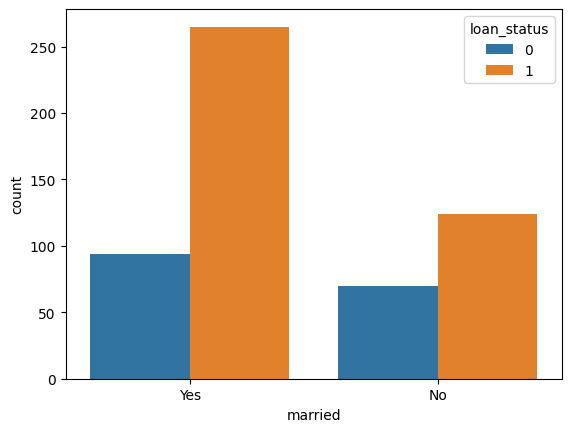

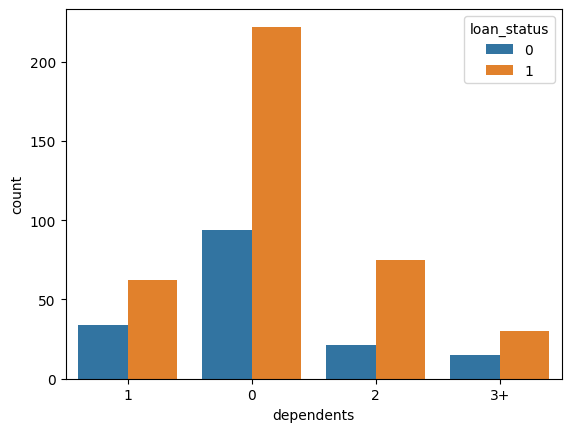

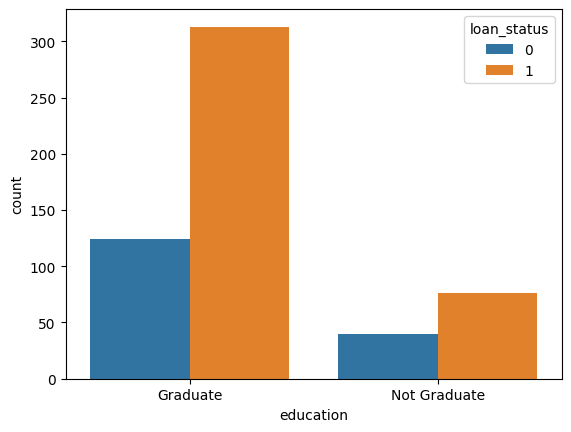

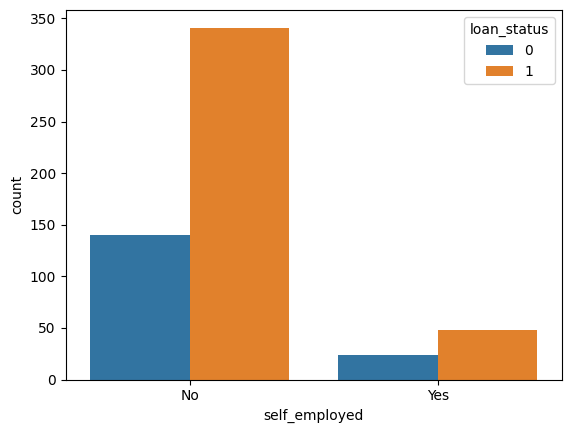

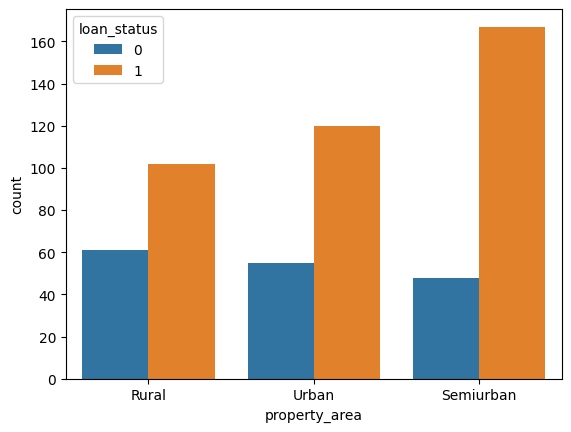

In [12]:
for col in loans.columns[loans.dtypes== "object"]:
    sns.countplot(data=loans, x=col, hue='loan_status')
    plt.show()

***Modeling***

In [19]:
X= loans[['loan_amount']]
y= loans[['loan_status']]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#stratify: balances because there are more approved then unapproved loans. same proportion of classes in y in both the training and testing sets.

clf= LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)

C:\Users\yarde\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
#Accuracy:
print(clf.score(X_test, y_test))

0.6987951807228916


Classifier accurately predicted 70% of the labels in the test set

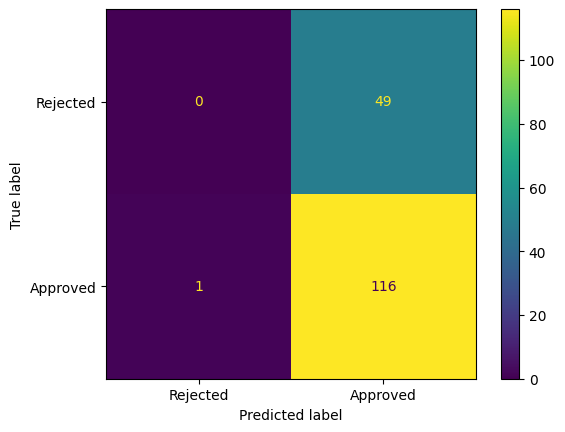

In [29]:
#Confusion Matrix
conf_matrix= confusion_matrix(y_test, y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix= conf_matrix, display_labels=['Rejected','Approved'])
disp.plot()
plt.show()

***Feature Engineering***

In [28]:
#Convert categorical features to binary and adding them
loans= pd.get_dummies(loans).astype(int)

loans.head()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,loan_status,gender_Female,gender_Male,married_No,married_Yes,...,dependents_1,dependents_2,dependents_3+,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,4583,1508,128,360,1,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
1,3000,0,66,360,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
2,2583,2358,120,360,1,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
3,6000,0,141,360,1,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
4,5417,4196,267,360,1,1,0,1,0,1,...,0,1,0,1,0,0,1,0,0,1


In [30]:
X= loans.drop(columns= ['loan_status'])
y= loans[['loan_status']]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

clf= LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)

C:\Users\yarde\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yarde\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
#Accuracy:
print(clf.score(X_test, y_test))

0.7771084337349398


Classifier accurately predicted 78% of the labels in the test set

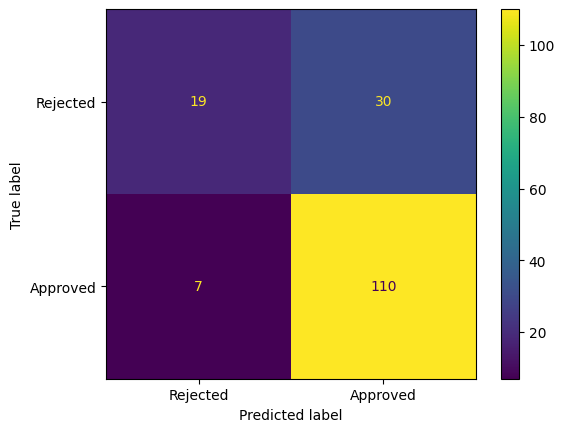

In [35]:
#Confusion Matrix
conf_matrix= confusion_matrix(y_test, y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix= conf_matrix, display_labels=['Rejected','Approved'])
disp.plot()
plt.show()

In [41]:
#Importance of features
feature_importance= pd.DataFrame({
    "feature": X_train.columns,
    "importance": clf.coef_.reshape(-1)
})
feature_importance

,feature,importance
0,applicant_income,0.000007
1,coapplicant_income,-0.000095
2,loan_amount,-0.002970
3,loan_amount_term,-0.003874
4,credit_history,2.737715
5,gender_Female,0.001086
6,gender_Male,0.044351
7,married_No,-0.064477
8,married_Yes,0.109914
9,dependents_0,-0.009589


C:\Users\yarde\AppData\Local\Temp\ipykernel_23640\2362050742.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=feature_importance, x="feature", y='importance', palette='Set2')


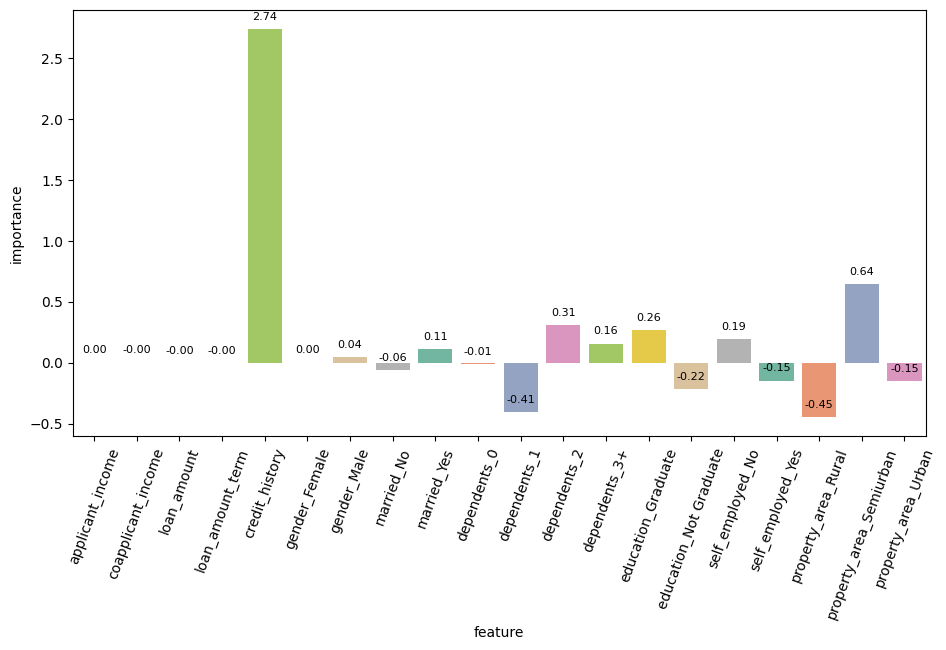

In [64]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=feature_importance, x="feature", y='importance', palette='Set2')

#show the importance values:
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                   fontsize=8)
plt.tight_layout()
plt.xticks(rotation=70)
plt.show()